In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="./data"
IMG_SIZE=100

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  True


In [2]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    # Creating and saving each image in the form of numerical data in an array
    img.append(image.flatten())
    labels.append([1,0])
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(image.flatten())
    labels.append([0,1])

In [3]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

[1, 0]


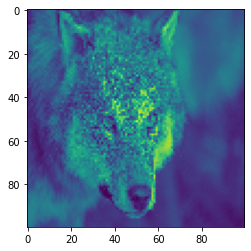

In [4]:
plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [ ]:
def getData(dataset):
    img = []
    label = []
    for x, y in dataset:
        img.append(x)
        label.append(y)
    return img,label

In [5]:
x_train=list(train_df.data)
y_train=list(train_df.label)
x_val=list(val_df.data)
y_val=list(val_df.label)
x_test=list(test_df.data)
y_test=list(test_df.label)

In [10]:
X=tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
Y=tf.placeholder(tf.float32,[None,2])
W=tf.Variable(tf.zeros([IMG_SIZE*IMG_SIZE,2]))
b=tf.Variable(tf.zeros([2]))
eps = 1e-12

In [22]:

h =tf.matmul(X,W)+b#1 / (1.0 + tf.exp(-(tf.matmul(img,W) + b)))
# softmax
actv = tf.nn.sigmoid(h)
# cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
prediction = tf.argmax(actv,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# loss1 = -(Y * tf.log(h + eps) + (1 - Y) * tf.log( 1 - h + eps))
loss1=tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=h)
loss = tf.reduce_mean(loss1)
# loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(actv), reduction_indices=1)) 
# loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), reduction_indices=1)) 
alpha = 0.0000001
update = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

loss_data = []


In [ ]:

accuracy.get_shape()

In [23]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,1000):
    # sess.run([update],feed_dict={X:x_train,Y:y_train})
    # if i%100==0:
    #     val_loss, val_accuracy, val_prediction, correct_predicate = sess.run([loss, accuracy, prediction, correct_prediction],feed_dict={X:x_val,Y:y_val})
    #     print('Test accuracy at step %s: %.2f%%' % (i, (val_accuracy * 100)))
    if i%100==0:
        # print(loss.eval(session= sess, feed_dict = {X:x_train,Y:y_train}))
        loss_data.append(loss.eval(session= sess, feed_dict = {X:x_train,Y:y_train}))
        train_acc,train_loss = sess.run([accuracy,loss], feed_dict={X:x_train,Y:y_train})
        print (" Training accuracy: %.3f, Training loss: %.3f" % (train_acc, train_loss))
        val_acc = sess.run(accuracy, feed_dict={X:x_val,Y:y_val})
        print (" Validation accuracy: %.3f" % (val_acc))
    sess.run([update],feed_dict={X:x_train,Y:y_train})
        # loss_data.append(loss.eval(session= sess, feed_dict = {X:x_train,Y:y_train}))
    # sess.run([update],feed_dict={X:x_train,Y:y_train})
print(loss_data)

 Training accuracy: 0.508, Training loss: 0.693
 Validation accuracy: 0.470
 Training accuracy: 0.614, Training loss: 0.673
 Validation accuracy: 0.610
 Training accuracy: 0.621, Training loss: 0.663
 Validation accuracy: 0.615
 Training accuracy: 0.625, Training loss: 0.658
 Validation accuracy: 0.610
 Training accuracy: 0.628, Training loss: 0.655
 Validation accuracy: 0.615
 Training accuracy: 0.631, Training loss: 0.653
 Validation accuracy: 0.615
 Training accuracy: 0.634, Training loss: 0.651
 Validation accuracy: 0.620
 Training accuracy: 0.634, Training loss: 0.649
 Validation accuracy: 0.620
 Training accuracy: 0.639, Training loss: 0.648
 Validation accuracy: 0.620
 Training accuracy: 0.643, Training loss: 0.646
 Validation accuracy: 0.610
[0.6931472, 0.6726478, 0.6634178, 0.65849495, 0.6553772, 0.65306735, 0.6511472, 0.64943236, 0.6478383, 0.6463242]


In [ ]:
def getBatch(data,d_label,curr_index,batch_size):
    return data[curr_index:curr_index+batch_size],d_label[curr_index:curr_index+batch_size]

In [ ]:
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(sess.run(accuracy, feed_dict={X: x_val, Y: y_val}))

In [ ]:
plt.ylabel('loss')
plt.xlabel('iteration in 1000')
plt.plot(loss_data)


In [ ]:

print(sess.run(accuracy, feed_dict={X: x_val, Y: y_val}))

In [ ]:
k={'data':x,'label':labels}
type(np.array(k['data']))

In [ ]:
np.array(k['data'])

In [ ]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((train_df.data, train_df.label))